# Now, every face will be cropped and saved

In [100]:
# In this cell, some libraries were imported
import cv2
import sys
import os
from PIL import Image, ImageDraw
import pylab
import time

In [66]:
#from PIL import Image as PIL_Image
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")
def capture(destination, image_nbumber):
    orig_img_path = destination + str(image_number)+'.JPG'
    !fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null
    return

In [67]:
image_number = 1
while(base.buttons[0].read()==0):
    capture(filepath, image_number)
    image_number += 1

In [101]:
# Face Detection Function
def detectFaces(image_name):
    print ("Face Detection Start.")
    # Read the image and convert to gray to reduce the data
    img = cv2.imread(image_name)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Color => Gray
    
    # The haarcascades classifier is used to train data
    #face_cascade = cv2.CascadeClassifier("/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)#1.3 and 5are the min and max windows of the treatures
    result = []
    for (x,y,width,height) in faces:
        result.append((x,y,x+width,y+height))
    print ("Face Detection Complete.")
    return result

In [102]:
from matplotlib import pyplot as plt
def draw(image):
    img_ori = Image.open(image)
    plt.imshow(img_ori),plt.show()

Face Detection Start.
Face Detection Complete.


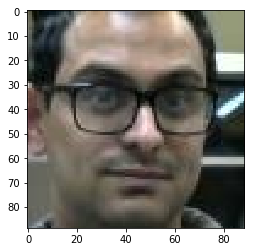

The 1 image were done.
Congratulation! The total of the 1 faces in the 1 image.
The time of 1 image is 2.129974126815796 s.
Face Detection Start.
Face Detection Complete.


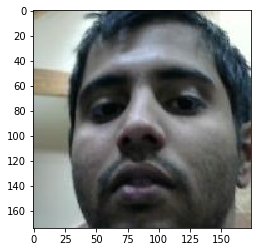

The 2 image were done.
Congratulation! The total of the 1 faces in the 2 image.
The time of 2 image is 2.2818472385406494 s.
Face Detection Start.
Face Detection Complete.
Error to detect face
The time of 3 image is 0.340238094329834 s.
Face Detection Start.
Face Detection Complete.


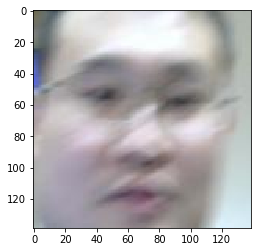

The 4 image were done.
Congratulation! The total of the 1 faces in the 4 image.
The time of 4 image is 2.060436964035034 s.
Face Detection Start.
Face Detection Complete.
Error to detect face
The time of 5 image is 0.24275588989257812 s.
Face Detection Start.
Face Detection Complete.
Error to detect face
The time of 6 image is 0.3966541290283203 s.
Face Detection Start.
Face Detection Complete.


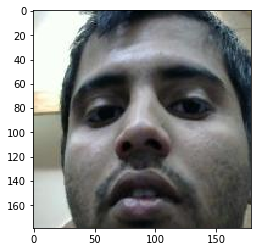

The 7 image were done.
Congratulation! The total of the 1 faces in the 7 image.
The time of 7 image is 2.1905457973480225 s.
Face Detection Start.
Face Detection Complete.
Error to detect face
The time of 8 image is 0.3062896728515625 s.
Face Detection Start.
Face Detection Complete.


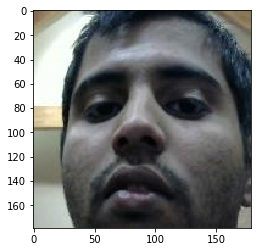

The 9 image were done.
Congratulation! The total of the 1 faces in the 9 image.
The time of 9 image is 2.1729962825775146 s.


In [103]:
#Crop faces and save them in the same directory
filepath ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/images/"
dir_path ="/home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/"
filecount = len(os.listdir(filepath))-1
image_count = 1#count is the number of images
face_cascade = cv2.CascadeClassifier("/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml")
for fn in os.listdir(filepath): #fn 表示的是文件名
    start = time.time()
    if image_count <= filecount:
        image_name = str(image_count) + '.JPG'
        image_path = filepath + image_name
        image_new = dir_path + image_name
        #print (image_path)
        #print (image_new)
        os.system('cp '+(image_path)+ (' /home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/'))
        faces = detectFaces(image_name)
        if not faces:
            print ("Error to detect face")
        if faces:
            #All croped face images will be saved in a subdirectory
            face_name = image_name.split('.')[0]
            #os.mkdir(save_dir)
            count = 0
            for (x1,y1,x2,y2) in faces:
                file_name = os.path.join(dir_path,face_name+str(count)+".jpg")
                face_name = os.path.basename(file_name)
                #print (face_name)
                Image.open(image_name).crop((x1,y1,x2,y2)).save(file_name)
                #os.system('rm -rf '+(image_path)+' /home/xilinx/jupyter_notebooks/OpenCV/Face_Detection/')
                count+=1    
                draw(file_name)
            print("The " + str(image_count) +" image were done.")
            print("Congratulation! The total of the " + str(count) + " faces in the " +str(image_count) + " image.")
        os.system('rm -rf '+(image_new))
    end = time.time()
    TimeSpan = end - start
    if image_count <= filecount:
        print ("The time of " + str(image_count) + " image is " +str(TimeSpan) + " s.")
    image_count = image_count + 1   